In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.patches import Circle
import os
import pickle
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from statannotations.Annotator import Annotator
from itertools import combinations

# QI, DI and NB incides calculation

In [5]:
df_food = pd.read_csv("df_food_filtered_with_food_group.csv",index_col=0)
with open("df_food_openfoodfacts_merged.pkl", "rb") as f:
    df_food_openfoodfacts = pickle.load(f, encoding="latin1")

C:\Users\Sophie\AppData\Local\Temp\ipykernel_3012\1585345951.py:1: DtypeWarning: Columns (2,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food = pd.read_csv("df_food_filtered_with_food_group.csv",index_col=0)


In [6]:
df_food = df_food[df_food["eaten_quantity_in_gram"] > 0]
df_food = df_food[df_food["energy_kcal_eaten"] > 0]

In [7]:

df_food.columns

Index(['food_id', 'barcode', 'dish_id', 'eaten_quantity', 'eaten_unit',
       'subject_key', 'eaten_at', 'eaten_at_utc_offset', 'media_count',
       'food_group_cname', 'type', 'display_name_en', 'display_name_fr',
       'display_name_de', 'fallback_food_id', 'standard_portion_quantity',
       'standard_portion_unit', 'specific_gravity', 'alcohol',
       'all_trans_retinol_equivalents_activity', 'beta_carotene',
       'beta_carotene_activity', 'calcium', 'carbohydrates', 'chloride',
       'cholesterol', 'energy_kcal', 'energy_kj', 'fat',
       'fatty_acids_monounsaturated', 'fatty_acids_polyunsaturated',
       'fatty_acids_saturated', 'fiber', 'folate', 'iodide', 'iron',
       'magnesium', 'niacin', 'pantothenic_acid', 'phosphorus', 'potassium',
       'protein', 'salt', 'sodium', 'starch', 'sugar', 'vitamin_a_activity',
       'vitamin_b1', 'vitamin_b12', 'vitamin_b2', 'vitamin_b6', 'vitamin_c',
       'vitamin_d', 'vitamin_e_activity', 'water', 'zinc',
       'eaten_quantit

In [8]:
df_food[[i for i in df_food.columns if 'eaten' in i]].columns

Index(['eaten_quantity', 'eaten_unit', 'eaten_at', 'eaten_at_utc_offset',
       'eaten_quantity_in_gram', 'energy_kcal_eaten', 'energy_kj_eaten',
       'carb_eaten', 'fat_eaten', 'protein_eaten', 'fiber_eaten',
       'alcohol_eaten', 'local_eaten_at', 'eaten_date',
       'all_trans_retinol_equivalents_activity_eaten', 'beta_carotene_eaten',
       'calcium_eaten', 'cholesterol_eaten',
       'fatty_acids_monounsaturated_eaten',
       'fatty_acids_polyunsaturated_eaten', 'fatty_acids_saturated_eaten',
       'folate_eaten', 'iron_eaten', 'magnesium_eaten', 'niacin_eaten',
       'pantothenic_acid_eaten', 'phosphorus_eaten', 'potassium_eaten',
       'salt_eaten', 'sodium_eaten', 'sugar_eaten', 'vitamin_b1_eaten',
       'vitamin_b12_eaten', 'vitamin_b2_eaten', 'vitamin_b6_eaten',
       'vitamin_c_eaten', 'vitamin_d_eaten', 'vitamin_e_activity_eaten',
       'zinc_eaten'],
      dtype='object')

In [9]:
df_food

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,vitamin_b12_eaten,vitamin_b2_eaten,vitamin_b6_eaten,vitamin_c_eaten,vitamin_d_eaten,vitamin_e_activity_eaten,zinc_eaten,start_date,cohort,food_group
0,13,NaN,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,dairy_products_meat_fish_eggs_tofu,...,2.310000e-06,0.000275,0.000154,0.00000,0.000000e+00,0.220,0.004730,2022-02-04,cohort_b,meat_fish_seafood
3,13,NaN,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,dairy_products_meat_fish_eggs_tofu,...,2.100000e-06,0.000250,0.000140,0.00000,0.000000e+00,0.200,0.004300,2023-01-10,cohort_b,meat_fish_seafood
4,25,NaN,202497,35.00,g,6ata8r,2021-03-30 13:52:23,120,1,vegetables_fruits,...,0.000000e+00,0.000010,0.000028,0.00315,0.000000e+00,0.035,0.000035,2021-03-22,cohort_b,fruits
5,25,NaN,283397,35.00,g,uzbc9s,2021-10-21 10:09:09,120,1,vegetables_fruits,...,0.000000e+00,0.000010,0.000028,0.00315,0.000000e+00,0.035,0.000035,2021-10-19,cohort_b,fruits
6,25,NaN,266679,40.00,g,fvh6kf,2021-09-19 10:14:35,120,1,vegetables_fruits,...,0.000000e+00,0.000012,0.000032,0.00360,0.000000e+00,0.040,0.000040,2021-09-10,cohort_b,fruits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,46573,4104420237155,426463,16.00,g,pgeyqb,2023-03-13 15:16:39,60,0,unclassified,...,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-03-01,cohort_b,sweets_desserts
514956,46573,4104420237155,426838,16.00,g,pgeyqb,2023-03-13 15:30:54,60,0,unclassified,...,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-03-01,cohort_b,sweets_desserts
514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,unclassified,...,3.800000e-07,0.000210,0.000000,0.00000,7.500000e-07,0.000,0.000000,2023-02-12,cohort_b,yogurt_fresh_dairy
514958,46588,7618500940806,425332,100.00,ml,pgeyqb,2023-03-06 18:31:08,60,1,unclassified,...,0.000000e+00,0.000000,0.000000,0.01200,0.000000e+00,0.000,0.000000,2023-03-01,cohort_b,vegetable_fruit_juices


In [10]:
nutrient_info = {
    'folate_eaten':                                         {'unit': 'mcg', 'target': 400,  'type': 'qualifying'},
    'niacin_eaten':                                         {'unit': 'mg',  'target': 14,   'type': 'qualifying'},
    'pantothenic_acid_eaten':                               {'unit': 'mg',  'target': 5,    'type': 'qualifying'},
    'vitamin_b2_eaten':                                     {'unit': 'mg',  'target': 1.1,  'type': 'qualifying'},
    'vitamin_b1_eaten':                                     {'unit': 'mg',  'target': 1.2,  'type': 'qualifying'},
    'all_trans_retinol_equivalents_activity_eaten':         {'unit': 'IU',  'target': 700,  'type': 'qualifying'},
    'beta_carotene_eaten':                                  {'unit' : 'mcg','target' : 700, 'type' :'qualifying'},
    'vitamin_b12_eaten':                                    {'unit': 'mcg', 'target': 2.4,  'type': 'qualifying'},
    'vitamin_b6_eaten':                                     {'unit': 'mg',  'target': 1.3,  'type': 'qualifying'},
    'vitamin_c_eaten':                                      {'unit': 'mg',  'target': 75,   'type': 'qualifying'},
    'vitamin_d_eaten':                                      {'unit': 'mcg', 'target': 7.5,  'type': 'qualifying'},
    'vitamin_e_activity_eaten':                             {'unit': 'TAE', 'target': 15,    'type': 'qualifying'},
    'calcium_eaten':                                        {'unit': 'mg',  'target': 1000, 'type': 'qualifying'},
    'iron_eaten':                                           {'unit': 'mg',  'target': 18,   'type': 'qualifying'},
    'magnesium_eaten':                                      {'unit': 'mg',  'target': 320,  'type': 'qualifying'},
    'phosphorus_eaten':                                     {'unit': 'mg',  'target': 700,  'type': 'qualifying'},
    'potassium_eaten':                                      {'unit': 'mg',  'target': 4700, 'type': 'qualifying'},
    'zinc_eaten':                                           {'unit': 'mg',  'target': 8,    'type': 'qualifying'},
    'fiber_eaten':                                          {'unit': 'g',   'target': 25,   'type': 'qualifying'},
    'protein_eaten':                                        {'unit': 'g',   'target': 46,   'type': 'qualifying'},
    'fat_eaten':                                            {'unit': 'g',   'target': 78,   'type': 'disqualifying'},
    'fatty_acids_saturated_eaten':                          {'unit': 'g',   'target': 22,   'type': 'disqualifying'},
    'cholesterol_eaten':                                    {'unit': 'mg',  'target': 300,  'type': 'disqualifying'},
    'sugar_eaten':                                          {'unit': 'g',   'target': 125,  'type': 'disqualifying'},
    'sodium_eaten':                                         {'unit': 'mg',  'target': 2400, 'type': 'disqualifying'},
    'salt_eaten' :                                          {'unit' : 'g',  'target': 6,   'type': 'disqualifying'}
}

conversion_factors = {
    "mg": 1000,
    "g": 1,
    "mcg": 1000000,
    "IU": 1,
    "TAE": 1,
}

In [11]:
df_food['beta_carotene_eaten'].describe()

count    317780.000000
mean          0.000147
std           0.000782
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000022
max           0.034995
Name: beta_carotene_eaten, dtype: float64

In [12]:
qualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'qualifying'}
disqualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'disqualifying'}

In [13]:
def scale_for_nbc(df, nutrient_cols, scaling_factor=2000):
    df = df.copy()

    for nutr in nutrient_cols:
        conversion_factor = conversion_factors[nutrient_info[nutr]['unit']]
        #print(conversion_factor)

        df[nutr + "_scaled"] = (
            df[nutr]
            * (scaling_factor / df["energy_kcal_eaten"])
            * conversion_factor
        )
        #if nutr == "beta_carotene_eaten":
            #print(f'df[nutr + "_scaled"] = ({df[nutr]} * ({scaling_factor} / {df["energy_kcal_eaten"]})* {conversion_factor})')

    return df


df_food_scaled = scale_for_nbc(df_food.fillna(0), list(nutrient_info.keys()), scaling_factor=2000)

In [14]:
for i in df_food_scaled.columns :
    print(i)

food_id
barcode
dish_id
eaten_quantity
eaten_unit
subject_key
eaten_at
eaten_at_utc_offset
media_count
food_group_cname
type
display_name_en
display_name_fr
display_name_de
fallback_food_id
standard_portion_quantity
standard_portion_unit
specific_gravity
alcohol
all_trans_retinol_equivalents_activity
beta_carotene
beta_carotene_activity
calcium
carbohydrates
chloride
cholesterol
energy_kcal
energy_kj
fat
fatty_acids_monounsaturated
fatty_acids_polyunsaturated
fatty_acids_saturated
fiber
folate
iodide
iron
magnesium
niacin
pantothenic_acid
phosphorus
potassium
protein
salt
sodium
starch
sugar
vitamin_a_activity
vitamin_b1
vitamin_b12
vitamin_b2
vitamin_b6
vitamin_c
vitamin_d
vitamin_e_activity
water
zinc
eaten_quantity_in_gram
energy_kcal_eaten
energy_kj_eaten
carb_eaten
fat_eaten
protein_eaten
fiber_eaten
alcohol_eaten
local_eaten_at
eaten_date
combined_name
all_trans_retinol_equivalents_activity_eaten
beta_carotene_eaten
calcium_eaten
cholesterol_eaten
fatty_acids_monounsaturated_eate

In [15]:
#good_df = pd.read_csv('t.csv',sep =',')
#good_df

In [16]:
df_food_scaled[[i for i in df_food_scaled if 'scaled' in i]].columns

Index(['folate_eaten_scaled', 'niacin_eaten_scaled',
       'pantothenic_acid_eaten_scaled', 'vitamin_b2_eaten_scaled',
       'vitamin_b1_eaten_scaled',
       'all_trans_retinol_equivalents_activity_eaten_scaled',
       'beta_carotene_eaten_scaled', 'vitamin_b12_eaten_scaled',
       'vitamin_b6_eaten_scaled', 'vitamin_c_eaten_scaled',
       'vitamin_d_eaten_scaled', 'vitamin_e_activity_eaten_scaled',
       'calcium_eaten_scaled', 'iron_eaten_scaled', 'magnesium_eaten_scaled',
       'phosphorus_eaten_scaled', 'potassium_eaten_scaled',
       'zinc_eaten_scaled', 'fiber_eaten_scaled', 'protein_eaten_scaled',
       'fat_eaten_scaled', 'fatty_acids_saturated_eaten_scaled',
       'cholesterol_eaten_scaled', 'sugar_eaten_scaled', 'sodium_eaten_scaled',
       'salt_eaten_scaled'],
      dtype='object')

In [17]:
def calculate_qi_ratios(row, nutrient_cols):

    qi_ratios = {}
    for nutr in nutrient_cols:
        qi_ratios[nutr + "_ratio"] = row[nutr + '_scaled'] / nutrient_info[nutr]['target']

    qi_ratios["QI"] = np.sum([i for i in qi_ratios.values()]) / len(
        nutrient_cols
    )

    qi_ratios["combined_name"] = row["combined_name"]
    qi_ratios["food_group"] = row["food_group"]
    qi_ratios["energy_kcal_eaten"] = row["energy_kcal_eaten"]
    qi_ratios["eaten_quantity_in_gram"] = row["eaten_quantity_in_gram"]

    return qi_ratios

In [18]:
def calculate_di_ratios(row, nutrient_cols):

    di_ratios = {}
    for nutr in nutrient_cols:
        di_ratios[nutr + "_ratio"] = row[nutr + '_scaled'] / nutrient_info[nutr]['target']

    di_ratios["DI"] = np.sum([i for i in di_ratios.values()]) / len(
        nutrient_cols
    )

    di_ratios["combined_name"] = row["combined_name"]
    di_ratios["food_group"] = row["food_group"]
    #di_ratios["energy_kcal_eaten"] = row["energy_kcal_eaten"]
    #di_ratios["eaten_quantity_in_gram"] = row["eaten_quantity_in_gram"]

    return di_ratios

In [19]:
def calculate_nb(row, nutrient_cols):
    
    qi = calculate_qi_ratios(row, nutrient_cols)
    
    nb_ratios = {}
    
    for nutrient in nutrient_cols:
      nb_ratios[nutrient + '_truncated'] = min(qi[nutrient + '_ratio'], 1)

    nb_ratios['NB'] = np.sum([i for i in nb_ratios.values()]) / len(nutrient_cols) * 100

    nb_ratios["combined_name"] = qi["combined_name"]
    nb_ratios["food_group"] = qi["food_group"]
    #nb_ratios["energy_kcal_eaten"] = qi["energy_kcal_eaten"]
    #nb_ratios["eaten_quantity_in_gram"] = qi["eaten_quantity_in_gram"]


    return nb_ratios

In [20]:
qi_ratios = df_food_scaled.apply(calculate_qi_ratios, axis=1, nutrient_cols=qualifying_nutrients)

qi_ratios = qi_ratios.apply(pd.Series)

qi_ratios 


,folate_eaten_ratio,niacin_eaten_ratio,pantothenic_acid_eaten_ratio,vitamin_b2_eaten_ratio,vitamin_b1_eaten_ratio,all_trans_retinol_equivalents_activity_eaten_ratio,beta_carotene_eaten_ratio,vitamin_b12_eaten_ratio,vitamin_b6_eaten_ratio,vitamin_c_eaten_ratio,...,phosphorus_eaten_ratio,potassium_eaten_ratio,zinc_eaten_ratio,fiber_eaten_ratio,protein_eaten_ratio,QI,combined_name,food_group,energy_kcal_eaten,eaten_quantity_in_gram
0,0.872483,5.848514,1.879195,3.050641,1.118568,0.230105,0.095877,11.744966,1.445534,0.000000,...,4.218600,0.856776,7.214765,0.000000,7.936971,2.498497,"Lamb, filet, pan fried, medium, without additi...",meat_fish_seafood,163.90,110.0
3,0.872483,5.848514,1.879195,3.050641,1.118568,0.230105,0.095877,11.744966,1.445534,0.000000,...,4.218600,0.856776,7.214765,0.000000,7.936971,2.498497,"Lamb, filet, pan fried, medium, without additi...",meat_fish_seafood,149.00,100.0
4,0.686275,0.756303,1.333333,1.069519,1.960784,0.000000,0.000000,0.000000,2.413273,4.705882,...,0.616246,1.084689,0.490196,2.196078,0.341006,1.047794,"Pineapple, unsweetened, canned",fruits,17.85,35.0
5,0.686275,0.756303,1.333333,1.069519,1.960784,0.000000,0.000000,0.000000,2.413273,4.705882,...,0.616246,1.084689,0.490196,2.196078,0.341006,1.047794,"Pineapple, unsweetened, canned",fruits,17.85,35.0
6,0.686275,0.756303,1.333333,1.069519,1.960784,0.000000,0.000000,0.000000,2.413273,4.705882,...,0.616246,1.084689,0.490196,2.196078,0.341006,1.047794,"Pineapple, unsweetened, canned",fruits,20.40,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.886544,0.917747,0.090215,Alnatura - Kakao Knusper Reis,sweets_desserts,60.64,16.0
514956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.886544,0.917747,0.090215,Alnatura - Kakao Knusper Reis,sweets_desserts,60.64,16.0
514957,0.000000,0.000000,0.000000,5.230386,0.000000,0.000000,0.000000,4.337900,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.315068,2.144133,0.952744,alpro - Joghurt (Heidelbeere),yogurt_fresh_dairy,73.00,100.0
514958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.545455,...,0.000000,0.000000,0.000000,0.000000,1.185771,0.786561,Biotta Sauerkraut,vegetable_fruit_juices,22.00,100.0


In [21]:
di_ratios = df_food_scaled.apply(calculate_di_ratios, axis=1, nutrient_cols=disqualifying_nutrients)

di_ratios = di_ratios.apply(pd.Series)

In [22]:
nb_ratios = df_food_scaled.apply(calculate_nb, axis=1, nutrient_cols=qualifying_nutrients)

nb_ratios = nb_ratios.apply(pd.Series)

In [23]:
df_food_scaled['QI'] = qi_ratios['QI']
df_food_scaled['DI'] = di_ratios['DI']
df_food_scaled['NB'] = nb_ratios['NB']


In [24]:
df_food_scaled[['QI', 'DI', 'NB', 'combined_name', 'food_group']].groupby('food_group').mean(numeric_only=True).sort_values('QI')

,QI,DI,NB
food_group,,,
alcoholic_beverages,0.109367,0.065052,10.066555
cooked_grains_pasta,0.171935,0.550426,11.649519
salty_snacks,0.211067,0.593006,15.912361
vegetable_oils,0.226091,0.731692,5.778491
soy_granules_textured_protein,0.361359,0.857280,11.298511
butter_margarine_spreads,0.392675,1.684666,19.033720
cream_based_foods,0.432614,1.509114,26.801131
cereal_grains_starches,0.458034,0.806066,33.541215
bread_pastries,0.673695,0.702151,30.106589


## Milk subgroups

In [25]:
for i in df_food[df_food['food_group'] == 'milk'].drop_duplicates('combined_name')['combined_name']:
    print(i)

Milk, ewe's, raw
Milk, goat
Milk, whole, powder
Skimmed milk
Milk
Lactose-free milk
Milk drink
Whole milk / unskimmed milk
Buttermilk
Coconut milk
Rice milk
Soya drink (soy milk)
Rice, milk
Alnatura Maudel Drink ungesüsst
Isola Bio Rice
Oat milk
Emmi ENERGY MILK NEW 26g HIGH PROTEIN Vanilla
Vanillemilch aus Milch
Naturaplan : Drink : Teilentrahmte Milch
Coop Mountain milk from the Friborg Pre-Alps
Almond drink (almond milk)
Emmi good day Milky drink
Cremo - Milch UHT
Milchmischerzeugnis aus Vollmilch
Cailler Milch
Coop naturaplan Reisgetränk Haselnuss
Coop : Freeform : Milch : Lactosefrei
Sojasun Schokolade
Coop - Drink Semi-skimmed milk, 1.5% milkfat
Sojasun Boisson de soja Nature
Coop : Karma : Bio Oat Drink Vegan
Alnatura - Coco drink natur
Sojasun Natural
Kondensmilch, gezuckert
VALFLORA : Homogenisiert Halbentrahmte Milch
freefrom Milch
ALNATURA - coconut nature vegan
Partially skimmed milk 2.5% fat
Migros Bio UHT Milch
Sojasun - Soja & Amande
MIGROS : AHA : Milch halbentrahmt lak

In [26]:
milk_catergories = {
    'vegan_milk' : [
        'soy', 'soja',
        'rice', 'riz', 'reis',
        'almond', 'amande', 'mandel',
        'coconut'

    ]
}

In [27]:
def create_milk_subgroup(name):
    name_lower = name.lower()

    for subgroup, keywords in milk_catergories.items():
        if any(keyword in name_lower for keyword in keywords):
            return subgroup
    return 'dairy_milk'

In [28]:
df_milk = df_food_scaled[df_food_scaled['food_group'] == 'milk'].copy()
df_milk['milk_subgroup'] = df_milk['combined_name'].apply(create_milk_subgroup)
df_milk
print(df_milk['milk_subgroup'].value_counts())

milk_subgroup
dairy_milk    5523
vegan_milk    1871
Name: count, dtype: int64


In [29]:
df_milk.groupby('milk_subgroup')[['QI', 'DI', 'NB']].mean()

,QI,DI,NB
milk_subgroup,,,
dairy_milk,7.672788,1.135514,52.625708
vegan_milk,0.385131,0.865403,15.503857


## Vegetables subgroup

In [30]:
vegetable_categories = {
    'root_vegetables': [
        'carrot', 'carotte', 'karotte', 'möhre',
        'beetroot', 'betterave', 'rote bete', 'rübe',
        'turnip', 'navet', 'steckrübe',
        'parsnip', 'panais', 'pastinake',
        'celeriac', 'céleri-rave', 'knollensellerie',
        'onion', 'oignon', 'zwiebel',
        'radish', 'radis', 'radieschen',
        'fennel', 'fenouil', 'fenchel',
        'potato', 'pomme de terre', 'kartoffel'
    ],
    'leafy_vegetables': [
        'spinach', 'épinard', 'spinat',
        'beet', 'blette', 'mangold',
        'chicory', 'chicorée',
        'endive', 'endivie',
        'lettuce', 'laitue', 'kopfsalat', 'salat',
        'kale', 'chou frisé', 'grünkohl',
        'cabbage', 'chou', 'kohl',
        'rocket', 'roquette', 'rucola',
        'arugula', 
        'mustard', 'moutarde', 'senf'
    ],
    'fruity_vegetables': [
        'avocado', 'avocat',
        'asparagus', 'asperge', 'spargel',
        'cucumber', 'cucumbers', 'concombre',
        'eggplant', 'aubergine',
        'olive',  
        'pea', 'peas', 'pois', 'erbse', 'erbsen',
        'maïs', 'mais',
        'tomato', 'tomate',
        'pepper', 'poivron', 'paprika',
        'squash', 'courge', 'kürbis',
        'zucchini', 'courgette'
    ],
    'pickled_vegetables' : [
        'cornichon', 'chirat',
        'pickled', 'mariné', 'eingelegt'

    ]
}


In [31]:
def create_vegetables_subgroup(name):
    name_lower = name.lower()
    for subgroup, keywords in vegetable_categories.items():
        if any(keyword in name_lower for keyword in keywords):
            return subgroup
    return 'other_vegetables'

In [32]:
df_vegetables = df_food_scaled[df_food_scaled['food_group']=='vegetables'].copy()
df_vegetables['vegetable_subgroup'] = df_vegetables['combined_name'].apply(create_vegetables_subgroup)
df_vegetables
print(df_vegetables['vegetable_subgroup'].value_counts())

vegetable_subgroup
other_vegetables      19038
fruity_vegetables     14801
root_vegetables        9934
leafy_vegetables       3721
pickled_vegetables       73
Name: count, dtype: int64


In [33]:
df_vegetables.groupby('vegetable_subgroup')[['QI', 'DI', 'NB']].mean(numeric_only=True)

,QI,DI,NB
vegetable_subgroup,,,
fruity_vegetables,6.911256,1.566425,77.454227
leafy_vegetables,10.889778,0.479766,65.208895
other_vegetables,8.841737,0.609207,64.743995
pickled_vegetables,1.646190,2.916040,67.497604
root_vegetables,14.997442,0.702344,76.645129


## Yogurt and fresh dairy subgroup

In [34]:
for i in df_food[df_food['food_group'] == 'yogurt_fresh_dairy'].drop_duplicates('combined_name')['combined_name']:
    print(i)

Curds, natural, min. 40% fidm
Curds, natural, with at most 10% fidm
Curds, natural, min. 20% fidm
Yaourt, yahourt, yogourt ou yoghourt, vanilla
Yaourt, yahourt, yogourt ou yoghourt, mocca
Yaourt, yahourt, yogourt ou yoghourt, chocolate
Yaourt, yahourt, yogourt ou yoghourt, strawberry
Yaourt, yahourt, yogourt ou yoghourt, flavored, low fat, with sweetener
Yaourt, yahourt, yogourt ou yoghourt, Bifidus, plain
Yaourt, yahourt, yogourt ou yoghourt, natural, low fat
Actimel
Yoghurt drink
Kefir drink
Soya Yaourt, yahourt, yogourt ou yoghourt
Activia
Yaourt, yahourt, yogourt ou yoghourt, sweetened, (average)
Kefir yoghurt
Cottage cheese
Petit-Suisse
Curd
coop naturaplan Jogurt Vanilla
coop naturaplan Griechischer Jogurt Nature
coop naturaplan  Griechischer Jogurt Nature
Milco: Yogourt au lait de la Gruyère
Naturaplan : Jogurt : Haselnuss
Greek Yaourt, yahourt, yogourt ou yoghourt
Soja Line Soyog Mango
Coop Qualité & Prix Half fat cottage cheese
Coop Jogurt à la Grecque
Léger Joghurt Nature
Els

In [35]:
yogurt_categories = {
    'plain_yogurt' : [
        'natural', 'nature', 'plain',
        'curd', 'fromage blanc', 'hüttenkäse',
        'c,ottage', 'caillé' 
    ],
    'flavored_yogurt' : [
        'vanilla', 'vanille',
        'strawberry', 'fraise', 'erdbeere',
        'chocolate', 'schokolade', 
        'mocca',
        'blueberry', 'myrtille', 'blaubeere',
        'rasberry', 'framboise', 'himbeere',
        'mango', ',mangue'
    ],
    'greek_yogurt' : [
        'greek', 'grec', 'griechisch',
        'skyr',
        'icelandic', 'islandais', 'isländisch'
    ],
    'yogurt_drink' : [
        'drink', 'boisson', 'getränlk',
        'kefir'
    ]
}

In [36]:
def create_yogurt_subgroup(name):
    name_lower = name.lower()
    for subgroup, keywords in yogurt_categories.items():
        if any(keyword in name_lower for keyword in keywords):
            return subgroup
    return 'other_yogurt'

In [37]:
df_yogurt = df_food_scaled[df_food_scaled['food_group']=='yogurt_fresh_dairy'].copy()
df_yogurt['yogurt_subgroup'] = df_yogurt['combined_name'].apply(create_yogurt_subgroup)
df_yogurt
print(df_yogurt['yogurt_subgroup'].value_counts())

yogurt_subgroup
plain_yogurt       2420
other_yogurt       2005
greek_yogurt        553
flavored_yogurt     494
yogurt_drink        312
Name: count, dtype: int64


In [38]:
df_yogurt.groupby('yogurt_subgroup')[['QI', 'DI', 'NB']].mean(numeric_only=True)

,QI,DI,NB
yogurt_subgroup,,,
flavored_yogurt,1.027273,0.823068,41.171545
greek_yogurt,44.103505,0.847100,41.857392
other_yogurt,1.388629,1.051200,43.070734
plain_yogurt,3.650064,1.035539,55.993233
yogurt_drink,0.300576,0.876483,10.717439


In [39]:
for i in  df_food_scaled.columns : 
    print(i)

food_id
barcode
dish_id
eaten_quantity
eaten_unit
subject_key
eaten_at
eaten_at_utc_offset
media_count
food_group_cname
type
display_name_en
display_name_fr
display_name_de
fallback_food_id
standard_portion_quantity
standard_portion_unit
specific_gravity
alcohol
all_trans_retinol_equivalents_activity
beta_carotene
beta_carotene_activity
calcium
carbohydrates
chloride
cholesterol
energy_kcal
energy_kj
fat
fatty_acids_monounsaturated
fatty_acids_polyunsaturated
fatty_acids_saturated
fiber
folate
iodide
iron
magnesium
niacin
pantothenic_acid
phosphorus
potassium
protein
salt
sodium
starch
sugar
vitamin_a_activity
vitamin_b1
vitamin_b12
vitamin_b2
vitamin_b6
vitamin_c
vitamin_d
vitamin_e_activity
water
zinc
eaten_quantity_in_gram
energy_kcal_eaten
energy_kj_eaten
carb_eaten
fat_eaten
protein_eaten
fiber_eaten
alcohol_eaten
local_eaten_at
eaten_date
combined_name
all_trans_retinol_equivalents_activity_eaten
beta_carotene_eaten
calcium_eaten
cholesterol_eaten
fatty_acids_monounsaturated_eate

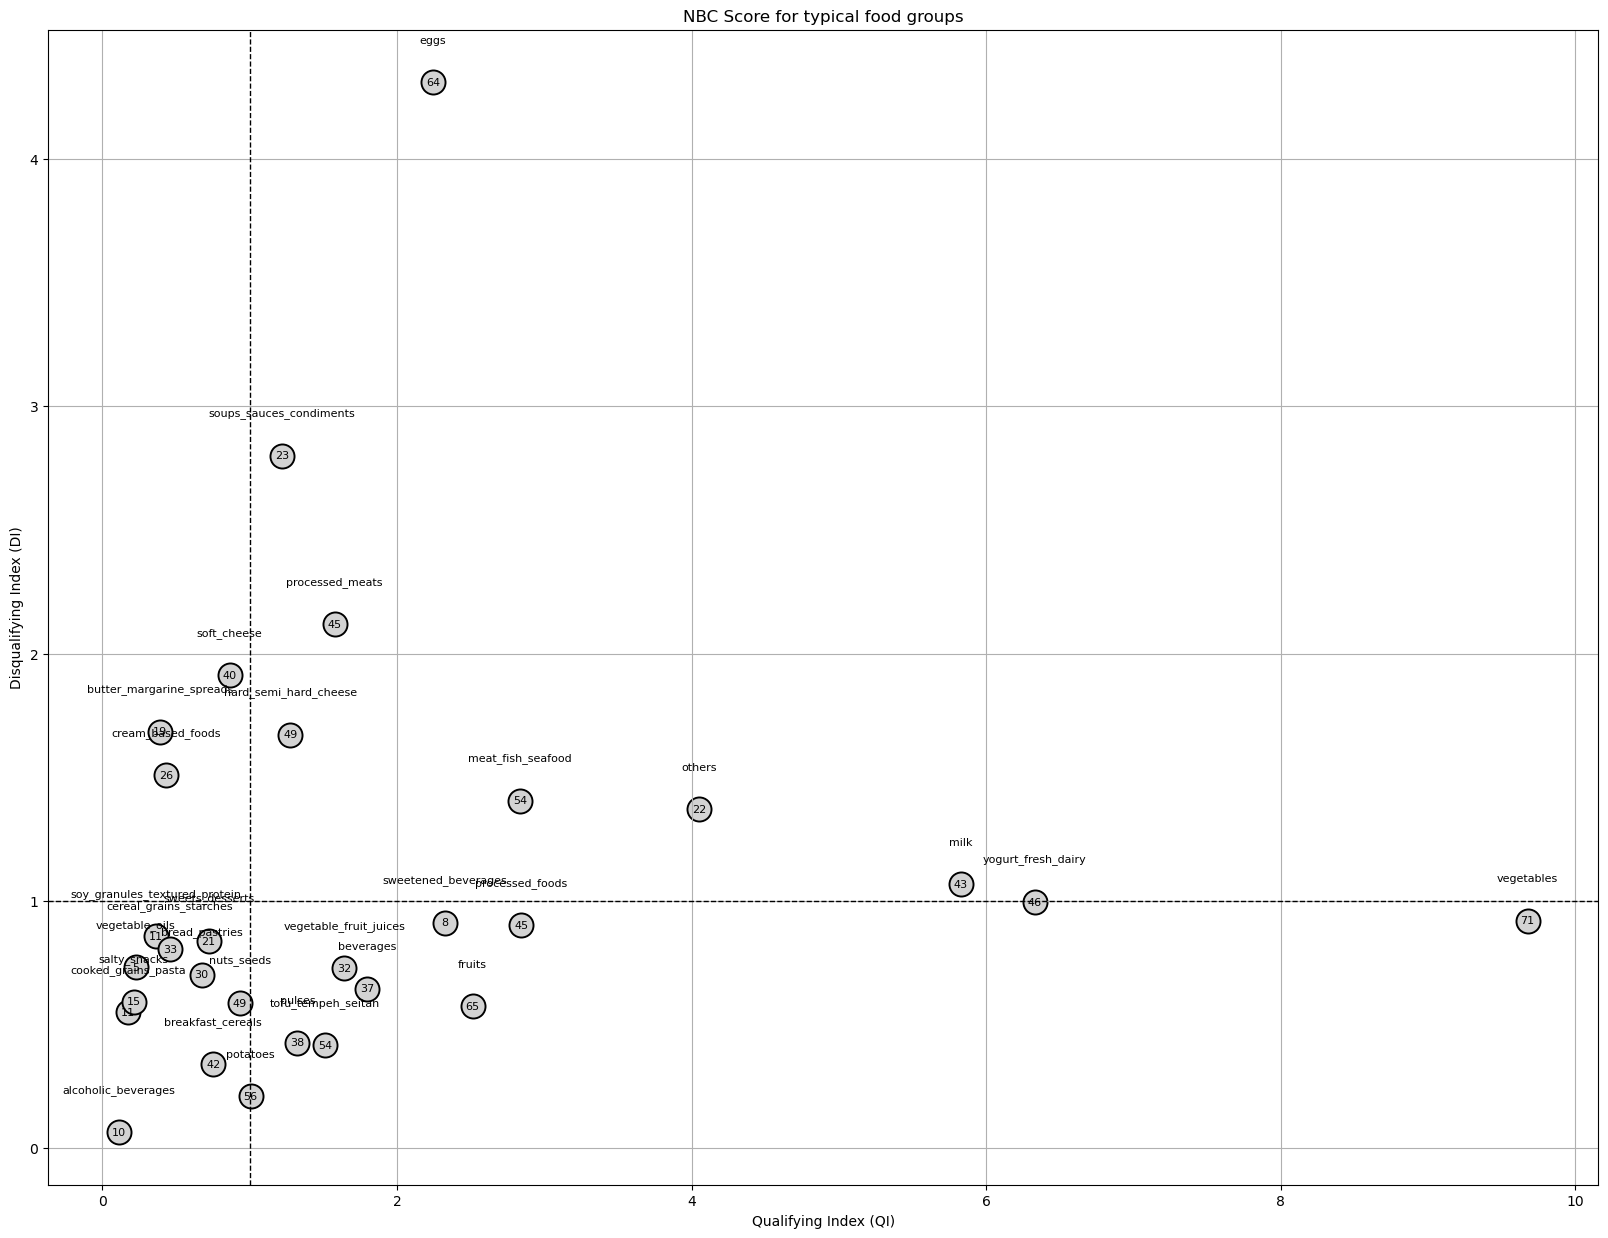

In [60]:
plt.figure(figsize=(20, 15))

data = df_food_scaled[['QI', 'DI', 'NB', 'combined_name', 'food_group']].groupby('food_group').mean(numeric_only=True).sort_values('QI')

ax = sns.scatterplot(data=data, x='QI',y='DI',s=300,color='lightgray',edgecolor='black')

for i, row in data.iterrows():

    x = row['QI']
    y = row['DI']
    nb_values = row['NB']

    plt.text(x, y, f"{int(nb_values)}", ha='center', va='center', fontsize=8)

    plt.text(x, y + 0.15, i ,ha='center', va='bottom',fontsize=8, color='black')


plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
plt.xlabel('Qualifying Index (QI)')
plt.ylabel('Disqualifying Index (DI)')
plt.title('NBC Score for typical food groups')
plt.grid()
plt.show()


# Classification of food into meals

In [61]:
df_food_scaled.groupby(["subject_key", "eaten_at"])["combined_name"].value_counts()

subject_key   eaten_at             combined_name                                  
02ae3856ca04  2018-11-26 07:20:04  Coffee, with caffeine                              1
              2018-11-26 07:47:34  Corn Flakes                                        1
                                   Honey n.s.                                         1
                                   Yaourt, yahourt, yogourt ou yoghourt, natural      1
              2018-11-26 08:56:24  Banana                                             1
                                                                                     ..
zznk4w        2022-09-25 06:11:19  Tomato, raw                                        1
              2022-09-25 09:19:35  Coffee, with caffeine                              1
                                   Oat milk                                           1
              2022-09-25 10:24:40  Porridge, prepared, with partially skimmed milk    1
              2022-09-25 10:36:35  Ca

In [62]:
def classify_meal_time(eaten_at):
    hour = eaten_at.hour

    if 5 <= hour < 11 :
        return 'breakfast'
    elif 11 <= hour < 16 :
        return 'lunch'
    else :
        return 'dinner'

In [77]:
df_food_scaled['eaten_at'] = pd.to_datetime(df_food_scaled['eaten_at'])
df_food_scaled['date'] = pd.to_datetime(df_food_scaled['eaten_at']).dt.date
df_food_scaled['meal'] = df_food_scaled['eaten_at'].apply(classify_meal_time)
df_food_scaled

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,fatty_acids_saturated_eaten_scaled,cholesterol_eaten_scaled,sugar_eaten_scaled,sodium_eaten_scaled,salt_eaten_scaled,QI,DI,NB,meal,date
0,13,0,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,dairy_products_meat_fish_eggs_tofu,...,22.818792,1181.208054,0.000000,1033.557047,0.000000,2.498497,1.029937,67.110660,dinner,2022-02-15
3,13,0,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,dairy_products_meat_fish_eggs_tofu,...,22.818792,1181.208054,0.000000,1033.557047,0.000000,2.498497,1.029937,67.110660,lunch,2023-01-18
4,25,0,202497,35.00,g,6ata8r,2021-03-30 13:52:23,120,1,vegetables_fruits,...,0.000000,0.000000,443.137255,78.431373,0.000000,1.047794,0.613055,61.770389,lunch,2021-03-30
5,25,0,283397,35.00,g,uzbc9s,2021-10-21 10:09:09,120,1,vegetables_fruits,...,0.000000,0.000000,443.137255,78.431373,0.000000,1.047794,0.613055,61.770389,breakfast,2021-10-21
6,25,0,266679,40.00,g,fvh6kf,2021-09-19 10:14:35,120,1,vegetables_fruits,...,0.000000,0.000000,443.137255,78.431373,0.000000,1.047794,0.613055,61.770389,breakfast,2021-09-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,46573,4104420237155,426463,16.00,g,pgeyqb,2023-03-13 15:16:39,60,0,unclassified,...,5.804749,0.000000,79.155673,0.000000,0.158311,0.090215,0.187741,9.021452,lunch,2023-03-13
514956,46573,4104420237155,426838,16.00,g,pgeyqb,2023-03-13 15:30:54,60,0,unclassified,...,5.804749,0.000000,79.155673,0.000000,0.158311,0.090215,0.187741,9.021452,lunch,2023-03-13
514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,unclassified,...,8.219178,0.000000,257.534247,0.000000,5.753425,0.952744,0.682545,30.000000,breakfast,2023-02-25
514958,46588,7618500940806,425332,100.00,ml,pgeyqb,2023-03-06 18:31:08,60,1,unclassified,...,0.000000,0.000000,363.636364,0.000000,90.909091,0.786561,3.010101,10.000000,dinner,2023-03-06


In [81]:
df_food_scaled.groupby(['subject_key', 'meal', 'date',])["combined_name"].value_counts()

subject_key   meal       date        combined_name          
02ae3856ca04  breakfast  2018-11-26  Bread, alpine              3
                                     Balsamic salad dressing    1
                                     Banana                     1
                                     Coffee, with caffeine      1
                                     Corn Flakes                1
                                                               ..
zznk4w        lunch      2022-09-23  Mixed nuts                 1
                                     Paprika chips              1
                         2022-09-24  Banana cake                2
                                     Chocolate Chips/Leaves     2
                                     Cake, chocolate            1
Name: count, Length: 280106, dtype: int64

In [83]:
df_food_scaled[df_food_scaled['subject_key'] == '02ae3856ca04']

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,fatty_acids_saturated_eaten_scaled,cholesterol_eaten_scaled,sugar_eaten_scaled,sodium_eaten_scaled,salt_eaten_scaled,QI,DI,NB,meal,date
10506,732,0,946,420.0,g,02ae3856ca04,2018-11-28 11:06:07,60,1,unclassified,...,81.578947,960.526316,7.894737,2434.210526,0.000000,1.112285,1.640484,59.909995,lunch,2018-11-28
10724,733,0,1480,70.0,g,02ae3856ca04,2018-12-06 13:47:03,60,1,unclassified,...,61.538462,532.544379,17.751479,5443.786982,0.000000,3.294457,1.419167,95.260637,lunch,2018-12-06
15110,1009,0,897,200.0,g,02ae3856ca04,2018-11-27 11:41:18,60,1,grains_potatoes_pulses,...,6.493506,0.000000,10.389610,6493.506494,0.000000,0.126200,0.527859,8.529080,lunch,2018-11-27
15372,1010,0,1227,180.0,g,02ae3856ca04,2018-12-02 19:06:39,60,1,grains_potatoes_pulses,...,0.000000,0.000000,18.181818,72.727273,0.000000,1.365492,0.034843,69.079880,dinner,2018-12-02
20246,1022,0,826,90.0,g,02ae3856ca04,2018-11-26 10:37:26,60,1,vegetables_fruits,...,0.000000,0.000000,0.000000,0.000000,7.878788,0.583663,0.283605,10.000000,breakfast,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469855,5641,0,1221,180.0,g,02ae3856ca04,2018-12-02 17:04:21,60,1,dairy_products_meat_fish_eggs_tofu,...,66.666667,333.333333,136.363636,1484.848485,0.000000,1.702623,1.208269,71.022034,dinner,2018-12-02
469856,5641,0,1375,180.0,g,02ae3856ca04,2018-12-05 09:17:17,60,1,dairy_products_meat_fish_eggs_tofu,...,66.666667,333.333333,136.363636,1484.848485,0.000000,1.702623,1.208269,71.022034,breakfast,2018-12-05
469857,5641,0,1457,150.0,g,02ae3856ca04,2018-12-06 07:20:27,60,1,dairy_products_meat_fish_eggs_tofu,...,66.666667,333.333333,136.363636,1484.848485,0.000000,1.702623,1.208269,71.022034,breakfast,2018-12-06
469858,5641,0,1544,150.0,g,02ae3856ca04,2018-12-07 08:11:47,60,1,dairy_products_meat_fish_eggs_tofu,...,66.666667,333.333333,136.363636,1484.848485,0.000000,1.702623,1.208269,71.022034,breakfast,2018-12-07


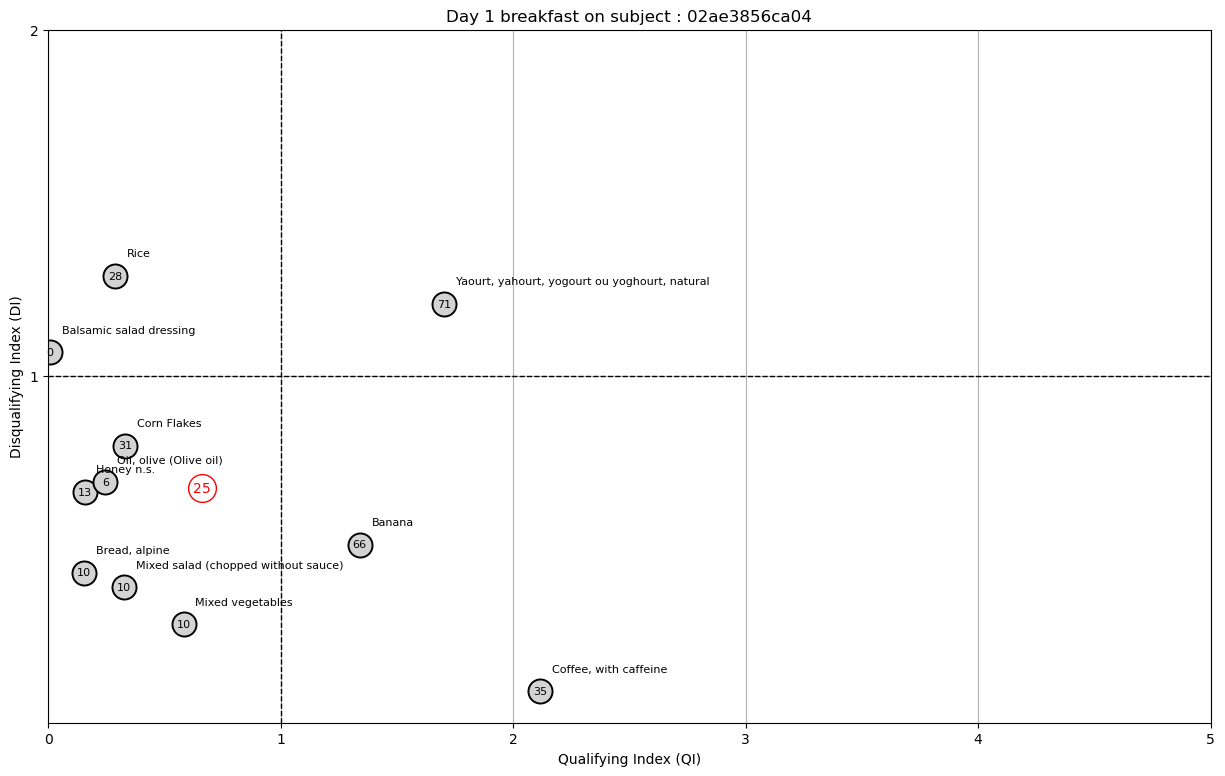

25.78992264037953


In [132]:
subject_id = '02ae3856ca04'
target_date = pd.to_datetime('2018-11-26').date()
meal_name = 'breakfast'



df_breakfast = df_food_scaled[(df_food_scaled['subject_key'] == subject_id) & (df_food_scaled['date'] == target_date) & (df_food_scaled['meal'] == meal_name)].copy()
df_breakfast = df_breakfast[['combined_name', 'QI', 'DI', 'NB', 'eaten_at']].drop_duplicates('combined_name')
df_breakfast = df_breakfast.sort_values('eaten_at')

combined_qi = df_breakfast['QI'].mean()
combined_di = df_breakfast['DI'].mean()
combined_nb = df_breakfast['NB'].mean()

plt.figure(figsize=(15,9))

ax = sns.scatterplot(data=df_breakfast, x='QI',y='DI',s=300,color='lightgray',edgecolor='black')

for i, row in df_breakfast.iterrows():
    
    x = row['QI']
    y = row['DI']
    nb_values = row['NB']


    plt.text(x, y, f"{int(nb_values)}", ha='center', va='center', fontsize=8)

    plt.text(x + 0.05, y + 0.05, row['combined_name'],ha='left', va='bottom', fontsize=8, color='black')



 
plt.scatter(combined_qi, combined_di, s=400, color='white', edgecolors='red', zorder=3)

plt.text(combined_qi, combined_di, str(int(combined_nb)),ha='center', va='center', color='red', fontsize=10)


plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

plt.xlim(0, 5)
plt.ylim(0, 2)
plt.yticks([1,2])

plt.xlabel('Qualifying Index (QI)')
plt.ylabel('Disqualifying Index (DI)')
plt.title(f'Day 1 {meal_name} on subject : {subject_id}')
plt.grid()
plt.show()

print(combined_nb)


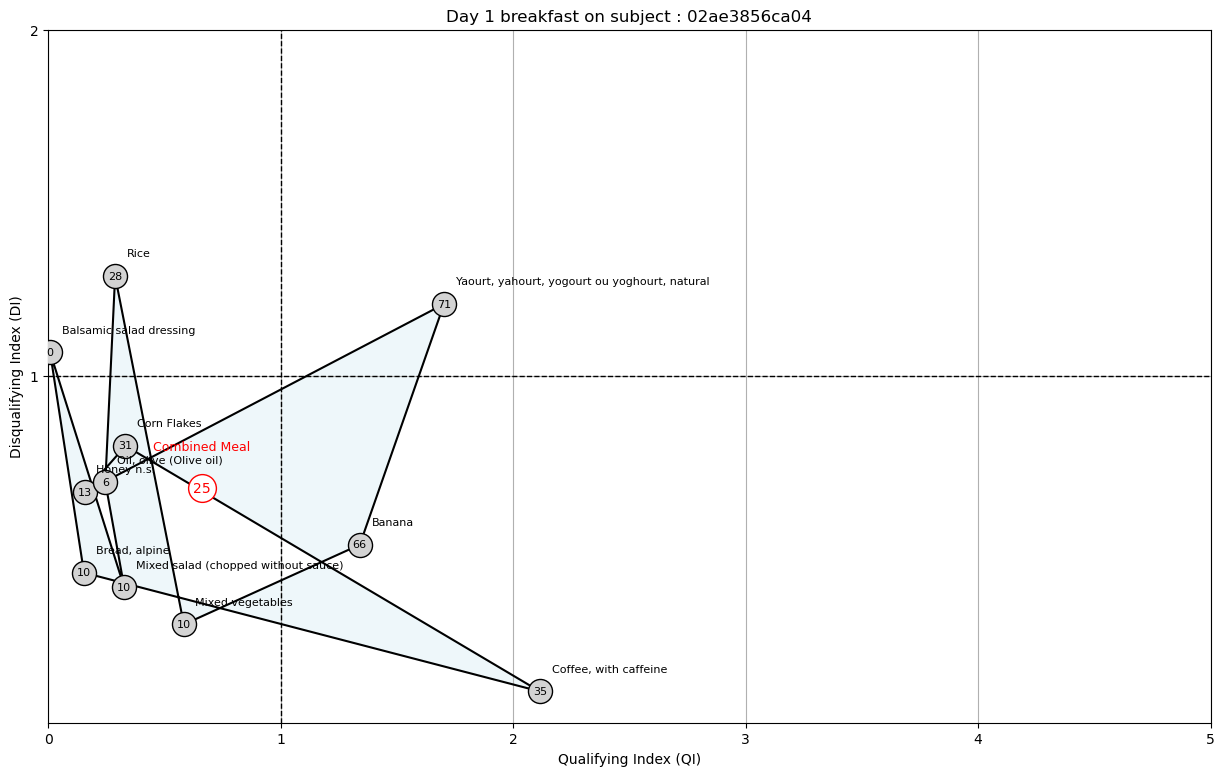

Combined NB: 25.78992264037953


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

subject_id = '02ae3856ca04'
target_date = pd.to_datetime('2018-11-26').date()
meal_name = 'breakfast'

# 1. Filter
df_breakfast = df_food_scaled[
    (df_food_scaled['subject_key'] == subject_id) &
    (df_food_scaled['date'] == target_date) &
    (df_food_scaled['meal'] == meal_name)
].copy()

# 2. Include 'eaten_at' so we can sort in consumption order
df_breakfast = df_breakfast[['combined_name', 'QI', 'DI', 'NB', 'eaten_at']].drop_duplicates('combined_name')

# If you don't have 'eaten_at', remove the .sort_values(...) line and skip the polygon approach

# 3. Sort by time (consumption order)
df_breakfast = df_breakfast.sort_values('eaten_at')

# 4. Compute combined meal
combined_qi = df_breakfast['QI'].mean()
combined_di = df_breakfast['DI'].mean()
combined_nb = df_breakfast['NB'].mean()

# 5. Prepare the polygon coordinates
x_coords = df_breakfast['QI'].tolist()
y_coords = df_breakfast['DI'].tolist()

# 6. Close the polygon by repeating the first point at the end
if len(x_coords) > 1:
    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])

plt.figure(figsize=(15, 9))

# 7. Fill the polygon (lightblue) and connect the points in black
#    Only if you have more than 2 items to form a polygon
if len(x_coords) > 2:
    plt.fill(x_coords, y_coords, alpha=0.2, color='lightblue', zorder=1)
    plt.plot(x_coords, y_coords, color='black', linestyle='-', zorder=2)

# 8. Plot each item as a circle
#    We'll do this manually instead of sns.scatterplot so we can control the polygon layering
for idx in range(len(df_breakfast)):
    row = df_breakfast.iloc[idx]
    x = row['QI']
    y = row['DI']
    nb_val = int(row['NB'])
    
    # Circle
    plt.scatter(x, y, s=300, color='lightgray', edgecolor='black', zorder=3)
    
    # NB in center
    plt.text(x, y, f"{nb_val}", ha='center', va='center', fontsize=8, color='black', zorder=4)
    
    # Food name offset
    plt.text(x + 0.05, y + 0.05, row['combined_name'], 
             ha='left', va='bottom', fontsize=8, color='black', zorder=4)

# 9. Plot the combined meal point (large circle with red outline)
plt.scatter(combined_qi, combined_di, s=400, color='white', edgecolors='red', zorder=5)
plt.text(combined_qi, combined_di, str(int(combined_nb)), 
         ha='center', va='center', color='red', fontsize=10, zorder=6)
plt.text(combined_qi, combined_di + 0.1, 'Combined Meal', 
         ha='center', va='bottom', color='red', fontsize=9, zorder=6)

# 10. Dashed lines at QI=1 and DI=1
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

# 11. Set x-axis and y-axis limits
plt.xlim(0, 5)
plt.ylim(0, 2)

# 12. Show only ticks at y=1 and y=2
plt.yticks([1, 2])

plt.xlabel('Qualifying Index (QI)')
plt.ylabel('Disqualifying Index (DI)')
plt.title(f'Day 1 {meal_name} on subject : {subject_id}')
plt.grid()
plt.show()

print("Combined NB:", combined_nb)
